# Sentimental Analysis for reviews related to British Airways

**Executive Summary**

British Airways is a major global airline that carries millions of passengers each year. The company collects a vast amount of feedback from its customers, both positive and negative. This feedback is valuable for understanding customer satisfaction and identifying areas for improvement. However, manually analyzing this feedback is a time-consuming and resource-intensive process.

Sentiment analysis is a technique that can be used to automatically analyze customer feedback and identify the overall sentiment of the feedback. This information can then be used to:

* Track changes in customer sentiment over time
* Identify areas where British Airways is excelling or falling short
* Develop targeted marketing campaigns
* Improve customer satisfaction

**Objectives**

The objectives of this project are to:

* Collect a large corpus of British Airways reviews
* Perform sentiment analysis on the reviews to identify the overall sentiment
* Analyze the sentiment of the reviews by topic
* Identify key themes and trends in the reviews
* Develop recommendations for British Airways based on the findings of the analysis

**Scope**

The scope of this project will be limited to reviews of British Airways written in English. The reviews will be collected from online review sites, and travel forums.

**Methodology**

The following methodology will be used to conduct the sentiment analysis:

1. **Data collection:** A web scraping tool will be used to collect a large corpus of British Airways reviews from a variety of sources.
2. **Data cleaning:** The collected reviews will be cleaned to remove irrelevant information, such as HTML tags and punctuation.
3. **Sentiment analysis:** A sentiment analysis tool will be used to analyze the sentiment of the reviews.
4. **Topic modeling:** Topic modeling will be used to identify the key themes and trends in the reviews.


**Resources**

The following resources will be needed to complete the project:

* A web scraping tool
* A sentiment analysis tool
* A topic modeling tool


**Conclusion**

The results of this project will provide British Airways with valuable insights into customer sentiment. This information can then be used to improve customer satisfaction and make informed business decisions.

## 1. Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit the site you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 1000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 1000 total reviews
Scraping page 2
   ---> 2000 total reviews
Scraping page 3
   ---> 3000 total reviews
Scraping page 4
   ---> 3713 total reviews
Scraping page 5
   ---> 3713 total reviews
Scraping page 6
   ---> 3713 total reviews
Scraping page 7
   ---> 3713 total reviews
Scraping page 8
   ---> 3713 total reviews
Scraping page 9
   ---> 3713 total reviews
Scraping page 10
   ---> 3713 total reviews


In [3]:
# creating a dataframe of reviews.
df = pd.DataFrame()
df["reviews"] = reviews
df.head()


,reviews
0,✅ Trip Verified | Once again a terrible busine...
1,✅ Trip Verified | BA A380's are showing their...
2,✅ Trip Verified | Credit to BA - Flew to Sin...
3,✅ Trip Verified | The check in area for prem...
4,✅ Trip Verified | The flight took off a littl...


In [4]:
# saving the data obtained into a csv.
df.to_csv("data/BA_reviews.csv")
import pandas as pd
df = pd.read_csv("data/BA_reviews.csv",index_col=0)
df

,reviews
0,✅ Trip Verified | Once again a terrible busine...
1,✅ Trip Verified | BA A380's are showing their...
2,✅ Trip Verified | Credit to BA - Flew to Sin...
3,✅ Trip Verified | The check in area for prem...
4,✅ Trip Verified | The flight took off a littl...
...,...
3708,HKG-LHR in New Club World on Boeing 777-300 - ...
3709,LHR to HAM. Purser addresses all club passenge...
3710,My son who had worked for British Airways urge...
3711,London City-New York JFK via Shannon on A318 b...


In [5]:
# Getting the basic information of the reviews dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713 entries, 0 to 3712
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3713 non-null   object
dtypes: object(1)
memory usage: 58.0+ KB


Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
# Remove unnecessary text
df['reviews'] = df['reviews'].str.replace(r'^(✅ Trip Verified|Not Verified) \|', '', regex=True)

# Display the cleaned DataFrame
print(df)

                                                reviews
0      Once again a terrible business class experien...
1       BA A380's are showing their age, hopefully t...
2        Credit to BA - Flew to Singapore recently a...
3        The check in area for premium classes at Ga...
4       The flight took off a little late due to Hea...
...                                                 ...
3708  HKG-LHR in New Club World on Boeing 777-300 - ...
3709  LHR to HAM. Purser addresses all club passenge...
3710  My son who had worked for British Airways urge...
3711  London City-New York JFK via Shannon on A318 b...
3712  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3713 rows x 1 columns]


In [7]:
# normalizing the data to lowecase
df.reviews =df['reviews'].str.lower()
df.head(2)

,reviews
0,once again a terrible business class experien...
1,"ba a380's are showing their age, hopefully t..."


In [8]:
# expanding the contractions (is-nots)
#import contractions
#from nltk.stem import WordNetLemmatizer

#def expand(text):
    # Expand contractions
 #   expanded_text = contractions.fix(text)

  #  return expanded_text

#df['reviews'] = df['reviews'].apply(expand)

In [9]:
# removing the html tags if there is any
import re
def remove_html(review):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', review)

df['reviews'] = df['reviews'].apply(remove_html)

In [10]:
# removing URL and @ sign if any
def preprocess_text_removingq_URLand_atsign(text):
    # Remove URLs
    clean_text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r'@[^\s]+', 'user', clean_text)
    # Other preprocessing steps like removing punctuation, converting to lowercase, etc.
    # ...
    return text
df['reviews'] = df['reviews'].apply(preprocess_text_removingq_URLand_atsign)

In [11]:
#Removing Punctuations
import string
exclude = string.punctuation
print(exclude)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
# removing punctuations from the reviews
def remove_punctuations(review):
    return review.translate(str.maketrans('','',exclude))

df['reviews']=df['reviews'].apply(remove_punctuations)
df.head()

,reviews
0,once again a terrible business class experien...
1,ba a380s are showing their age hopefully the...
2,credit to ba flew to singapore recently an...
3,the check in area for premium classes at ga...
4,the flight took off a little late due to hea...


In [13]:
# tokenize the tweets
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
def tokenize_text(review):
    return word_tokenize(review)

df['reviews']=df['reviews'].apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to /home/paul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews
0,"[once, again, a, terrible, business, class, ex..."
1,"[ba, a380s, are, showing, their, age, hopefull..."
2,"[credit, to, ba, flew, to, singapore, recently..."
3,"[the, check, in, area, for, premium, classes, ..."
4,"[the, flight, took, off, a, little, late, due,..."


In [14]:
# removing stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(review):
    # Use list comprehension for efficient list creation
    new_review = [word for word in review if word not in stop_words]
    return " ".join(new_review)

# Apply the function to the 'review' column
df['reviews']=df['reviews'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /home/paul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviews
0,terrible business class experience ba flight d...
1,ba a380s showing age hopefully update interior...
2,credit ba flew singapore recently also back do...
3,check area premium classes gatwick nice queue ...
4,flight took little late due heathrow congestio...


In [15]:
# re-tokenizing the data
df['reviews']=df['reviews'].apply(tokenize_text)
df.head()

,reviews
0,"[terrible, business, class, experience, ba, fl..."
1,"[ba, a380s, showing, age, hopefully, update, i..."
2,"[credit, ba, flew, singapore, recently, also, ..."
3,"[check, area, premium, classes, gatwick, nice,..."
4,"[flight, took, little, late, due, heathrow, co..."


### Data Analysis

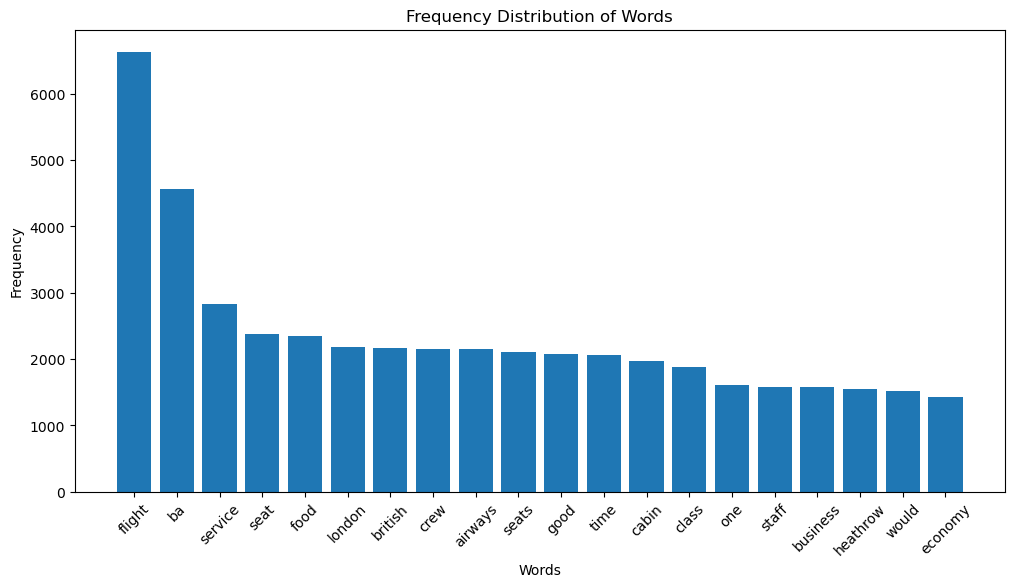

In [16]:
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

#Frequency Distribution after Removing Stopwords
reviews = df.reviews
# Flatten the list of tokens into a single list
all_tokens = [review for sublist in reviews for review in sublist]

# Create the frequency distribution
freq_dist = FreqDist(all_tokens)

# Get the most common words
most_common = freq_dist.most_common(20)

# Extract the words and frequencies
words, frequencies = zip(*most_common)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Words')
plt.xticks(rotation=45)
plt.show()


#### ***Observation***
Just by looking at this, we can see there is a high occurence of

* flight

* ba(**British Airways**)

* Service , places like Landon, food, seats and good.

These words probably occur across our various sentiments and may not necessarily add any meaning, unless a majority of their occurence is associated with a particular emotion

In [17]:
# Assuming 'reviews' contains the list of reviews
specific_character = '`'

# Loop through reviews and print the one containing the specific character
for i, review in enumerate(reviews):
    if specific_character in review:
        print(f"Review {i + 1}: {review}")


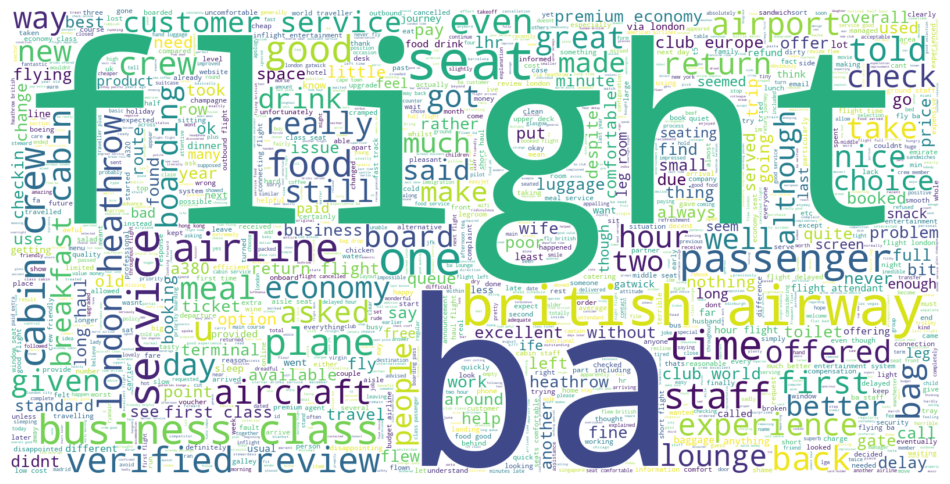

In [18]:
# Here we can Plot a word cloud to see some of the most common words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(df):
    # Flatten and concatenate all text data in the DataFrame
    all_text = " ".join(" ".join(map(str, review)) for review in df['reviews'])

    # Create the word cloud
    wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        max_words=2000,
        min_font_size=5
    ).generate(all_text)

    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Call the function with the DataFrame 'df'
generate_word_cloud(df)


In [19]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Create a VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores and labels for each review
sentiment_scores = []
sentiment_labels = []

for review_list in df['reviews']:
    review = " ".join(review_list)  # Convert list of strings to a single string
    scores = analyzer.polarity_scores(review)
    compound_score = scores['compound']

    if compound_score >= 0.05:
        sentiment_label = "positive"
    elif compound_score <= -0.05:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"

    sentiment_scores.append(scores)
    sentiment_labels.append(sentiment_label)

# Add sentiment scores and labels as new columns in the DataFrame
df['sentiment_scores'] = sentiment_scores
df['sentiment_labels'] = sentiment_labels

# Print the DataFrame with sentiment scores and labels
df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/paul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,sentiment_scores,sentiment_labels
0,"[terrible, business, class, experience, ba, fl...","{'neg': 0.209, 'neu': 0.763, 'pos': 0.028, 'co...",negative
1,"[ba, a380s, showing, age, hopefully, update, i...","{'neg': 0.064, 'neu': 0.622, 'pos': 0.314, 'co...",positive
2,"[credit, ba, flew, singapore, recently, also, ...","{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...",positive
3,"[check, area, premium, classes, gatwick, nice,...","{'neg': 0.122, 'neu': 0.585, 'pos': 0.293, 'co...",positive
4,"[flight, took, little, late, due, heathrow, co...","{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",positive
...,...,...,...
3708,"[hkglhr, new, club, world, boeing, 777300, 260...","{'neg': 0.05, 'neu': 0.717, 'pos': 0.234, 'com...",positive
3709,"[lhr, ham, purser, addresses, club, passengers...","{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'comp...",positive
3710,"[son, worked, british, airways, urged, fly, br...","{'neg': 0.067, 'neu': 0.81, 'pos': 0.122, 'com...",positive
3711,"[london, citynew, york, jfk, via, shannon, a31...","{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'comp...",positive


In [20]:
df.sentiment_labels.value_counts(normalize=True)

positive    0.654188
negative    0.328845
neutral     0.016967
Name: sentiment_labels, dtype: float64

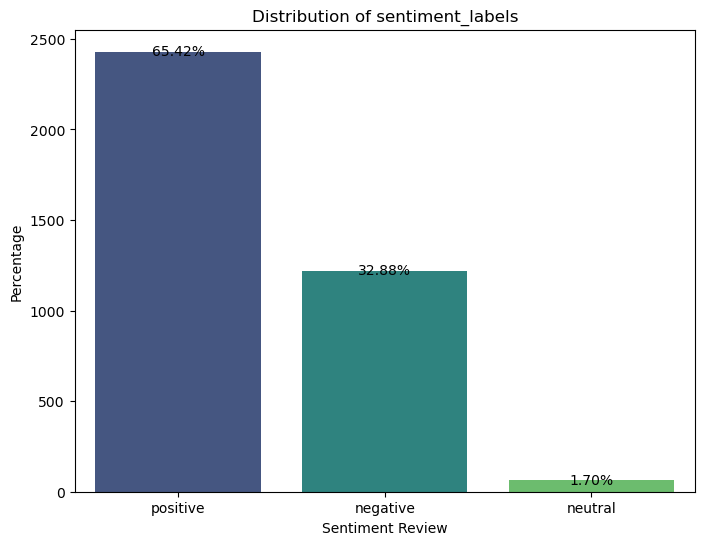

In [21]:
import seaborn as sns

# Assuming 'sentiment_labels' is a list in each row, extract the first element
df['sentiment_labels'] = df['sentiment_labels'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Calculate percentages of sentiment_labels
sentiment_labels_percentages = df['sentiment_labels'].value_counts(normalize=True) * 100

# Get the order of bars sorted by their percentages in descending order
order = sentiment_labels_percentages.index

# Plotting a countplot for sentiment labels with specified order
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment_labels', data=df, order=order, palette='viridis')

# Annotate each bar with its percentage value
total_count = len(df['sentiment_labels'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            f'{height/total_count*100:.2f}%', ha='center', va='center', fontsize=10, color='black')

plt.title('Distribution of sentiment_labels')
plt.xlabel('Sentiment Review')
plt.ylabel('Percentage')
plt.show()


#### ***Observation***
Just by looking at this, we can see that about 55% of the reviews are positive, 42% of the reviews are negative and just 2% of the reviews are neutral



## Lemmatization
We want to produce valid words, better suited for tasks like text analysis, sentiment analysis, and topic modeling.
example: Lemmatizing "running" would result in "run," and "better" would remain "better."


In [22]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/paul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# Create Lemmatizer
from nltk.stem import WordNetLemmatizer
word_lem = WordNetLemmatizer()

# Function for lemmatization
def lem_words(review):
    return [word_lem.lemmatize(word) for word in review]

# Assuming 'reviews' is a column containing lists of words in each review
df['lemmatized_reviews'] = df['reviews'].apply(lem_words)
df['lemmatized_reviews'].head()

0    [terrible, business, class, experience, ba, fl...
1    [ba, a380s, showing, age, hopefully, update, i...
2    [credit, ba, flew, singapore, recently, also, ...
3    [check, area, premium, class, gatwick, nice, q...
4    [flight, took, little, late, due, heathrow, co...
Name: lemmatized_reviews, dtype: object

In [24]:
df.head()

,reviews,sentiment_scores,sentiment_labels,lemmatized_reviews
0,"[terrible, business, class, experience, ba, fl...","{'neg': 0.209, 'neu': 0.763, 'pos': 0.028, 'co...",negative,"[terrible, business, class, experience, ba, fl..."
1,"[ba, a380s, showing, age, hopefully, update, i...","{'neg': 0.064, 'neu': 0.622, 'pos': 0.314, 'co...",positive,"[ba, a380s, showing, age, hopefully, update, i..."
2,"[credit, ba, flew, singapore, recently, also, ...","{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...",positive,"[credit, ba, flew, singapore, recently, also, ..."
3,"[check, area, premium, classes, gatwick, nice,...","{'neg': 0.122, 'neu': 0.585, 'pos': 0.293, 'co...",positive,"[check, area, premium, class, gatwick, nice, q..."
4,"[flight, took, little, late, due, heathrow, co...","{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",positive,"[flight, took, little, late, due, heathrow, co..."


In [25]:
# Print some examples where lemmatization differs
for i in range(10):
    original_review = df['reviews'][i]
    lemmatized_review = df['lemmatized_reviews'][i]

    # Check for differences
    differences = [pair for pair in zip(original_review, lemmatized_review) if pair[0] != pair[1]]

    if differences:
        print(f"Original: {original_review}")
        print(f"Lemmatized: {lemmatized_review}")
        print(f"Differences: {differences}")
        print("\n")


Original: ['terrible', 'business', 'class', 'experience', 'ba', 'flight', 'delayed', '45', 'hours', 'plane', 'old', 'problems', 'least', '4', 'seats', 'business', 'class', 'cleaned', 'properly', 'prior', 'departure', 'food', 'terrible', 'always', 'ba', 'one', 'choice', 'available', 'advertised', 'menu', 'result', 'delay', 'missed', 'connecting', 'flight', 'heathrow', 'instead', 'putting', 'us', 'next', 'connection', 'chose', 'second', 'last', 'flight', 'day', 'also', 'delayed', 'hour', 'meaning', 'additional', '4', 'hour', 'delay', 'whilst', 'heathrow', 'point', 'advised', 'compensation', 'rights', 'despite', 'asking', 'check', 'connections', 'provided', 'vouchers', 'delays', 'flown', 'etihad', 'qatar', 'virgin', 'business', 'class', 'equivalents', 'last', 'year', 'clear', 'see', 'big', 'gulf', 'ba', 'rivals']
Lemmatized: ['terrible', 'business', 'class', 'experience', 'ba', 'flight', 'delayed', '45', 'hour', 'plane', 'old', 'problem', 'least', '4', 'seat', 'business', 'class', 'cleane

As we can see from the above most of the words have been lemmatized as we wanted

### Dealing with Emojis
**Replace Emojis with Descriptions**:

Replace emojis with their corresponding descriptions. This can help maintain some information about the emotional content while removing the graphical representation.



In [26]:
# We create a function that replaces emojis in tweet text with their corresponding meanings.
#import emoji

#def replace_emojis_with_descriptions(text):
    # Replace emojis with their descriptions (without colons)
 #   return emoji.demojize(text, delimiters=(' ', ' ')).replace(':', ' ')

#df['lemmatized_reviews'] = df['lemmatized_reviews'].apply(replace_emojis_with_descriptions)
#df['lemmatized_reviews'].head()


### vectorization
#### CountVectorization

Techniques is used for converting text documents into numerical representations. The following code snippet creates a Bag-of-Words representation of the lemmatized reviews using the CountVectorizer from scikit-learn.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the lemmatized words into strings
df['lemmatized_reviews_str'] = df['lemmatized_reviews'].apply(lambda x: ' '.join(x))


## Feature engineering

### Label Encoding the Target

Here we label encode the target feature to transform the values to numerical values.

In [28]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Fit and transform
df['labels'] = le.fit_transform(df['sentiment_labels'])

# View the classes
classes = le.classes_
print(classes)


['negative' 'neutral' 'positive']


In [29]:
# previewing the dataset
df.head()

,reviews,sentiment_scores,sentiment_labels,lemmatized_reviews,lemmatized_reviews_str,labels
0,"[terrible, business, class, experience, ba, fl...","{'neg': 0.209, 'neu': 0.763, 'pos': 0.028, 'co...",negative,"[terrible, business, class, experience, ba, fl...",terrible business class experience ba flight d...,0
1,"[ba, a380s, showing, age, hopefully, update, i...","{'neg': 0.064, 'neu': 0.622, 'pos': 0.314, 'co...",positive,"[ba, a380s, showing, age, hopefully, update, i...",ba a380s showing age hopefully update interior...,2
2,"[credit, ba, flew, singapore, recently, also, ...","{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compou...",positive,"[credit, ba, flew, singapore, recently, also, ...",credit ba flew singapore recently also back do...,2
3,"[check, area, premium, classes, gatwick, nice,...","{'neg': 0.122, 'neu': 0.585, 'pos': 0.293, 'co...",positive,"[check, area, premium, class, gatwick, nice, q...",check area premium class gatwick nice queue ar...,2
4,"[flight, took, little, late, due, heathrow, co...","{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",positive,"[flight, took, little, late, due, heathrow, co...",flight took little late due heathrow congestio...,2


In [30]:
# displaying the encoding scheme
df[['sentiment_labels', 'labels']].head(10)

,sentiment_labels,labels
0,negative,0
1,positive,2
2,positive,2
3,positive,2
4,positive,2
5,positive,2
6,positive,2
7,positive,2
8,negative,0
9,negative,0


#  Modeling
* The problem at hand is a classification problem.
* We will explore 2 models: a binary logistic regression model, a multi-class XGBoost model and MultinomialNB.
* Model accuracy will be the metric for evaluation.
* Justification: Accuracy to get a verdict if a tweet is positive or negative.

* Accuracy of 70% will be the threshold to deem the model as successful.

### 1. LogisticRegression for Binary classification
* In this section we create a base model to identify if a tweet is 'Positive' or 'Negative'.
* LogisticRegression will be used for the classification.
* The normal preprocessing of vectorization and train test split will be implemented.

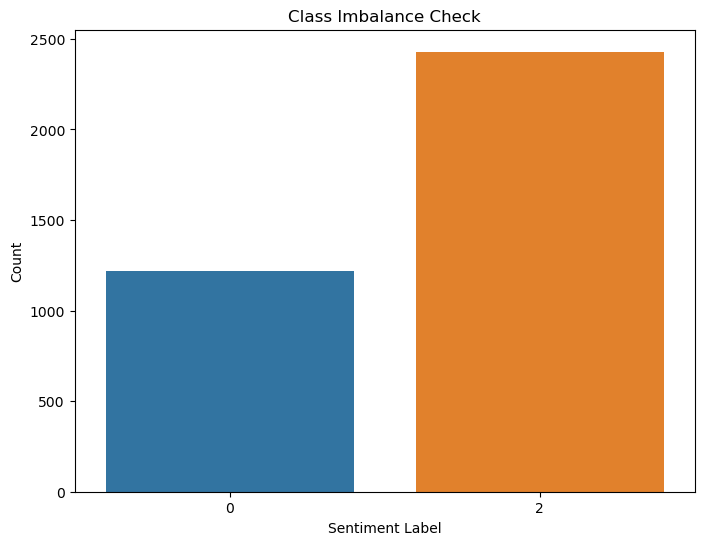

Accuracy: 0.836986301369863
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       241
           2       0.87      0.89      0.88       489

    accuracy                           0.84       730
   macro avg       0.82      0.81      0.81       730
weighted avg       0.84      0.84      0.84       730



/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

# Join the lemmatized words into strings
df['lemmatized_reviews_str'] = df['lemmatized_reviews'].apply(lambda x: ' '.join(x))


# Create a copy of the original data
data_copy = df.copy()

# Define the values to drop
value_to_drop = [1]

# Drop rows with the specified values in the 'labels' column
data_copy = data_copy[~data_copy['labels'].isin(value_to_drop)]

# Plot class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='labels', data=data_copy)
plt.title('Class Imbalance Check')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# Split the data into features (X) and target variable (y)
X = data_copy['lemmatized_reviews_str']
y = data_copy['labels']

# Save binary and multi-class datasets
X_copy = X.copy()
X_copy.to_csv('binary.csv', index=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save binary and multi-class datasets
X_copy = X_train.copy()
X_copy.to_csv('binary.csv', index=False)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))


### Model Summary

1. **Accuracy: 0.79**
   - The overall accuracy of the model is 79%. This indicates the proportion of correctly predicted instances among all instances.

2. **Precision:**
   - For class 0 (negative review):
      - Precision is 73%, meaning that of all instances predicted as class 0, 73% are truly class 0.
   - For class 2 (positive review):
      - Precision is 82%, indicating that of all instances predicted as class 2, 82% are truly class 2.

3. **Recall (Sensitivity):**
   - For class 0:
      - Recall is 71%, indicating that the model correctly identifies 71% of all actual instances of class 0.
   - For class 2:
      - Recall is 83%, meaning that the model correctly identifies 83% of all actual instances of class 2.

4. **F1-Score:**
   - The F1-score is the harmonic mean of precision and recall, providing a balance between the two.
   - For class 0, the F1-score is 72%.
   - For class 2, the F1-score is 82%.

5. **Support:**
   - The number of actual occurrences of each class in the test set.
   - Class 0 has a support of 77 instances, and class 2 has a support of 119 instances.

6. **Macro Average and Weighted Average:**
   - The macro average calculates the average of precision, recall, and F1-score across classes, giving each class equal weight.
   - The weighted average considers the number of instances for each class, providing a weighted average based on support.

In summary, the model demonstrates good overall performance with decent precision, recall, and F1-score for both classes. The weighted average takes into account the class imbalance, providing a more representative evaluation metric for an imbalanced dataset.

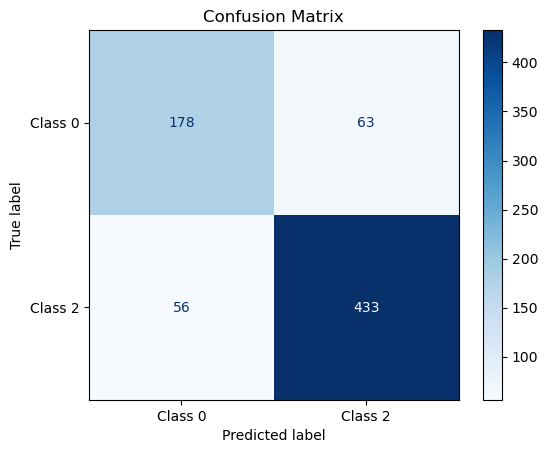

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Assuming 'y_test' and 'y_pred' are the true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 2'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()



### Testing Logistic Regression Model here

* We take a sample sentence, preprocess it then pass it to the model to see the output.

In [33]:
# sample review
review = '✅ Trip Verified | Liked this airline! They were organized, cozy, on time & nice. Will definitely fly with them again. Internet & entertainment should be added though.'


In [34]:
# lowercase
review = review.lower()
review

'✅ trip verified | liked this airline! they were organized, cozy, on time & nice. will definitely fly with them again. internet & entertainment should be added though.'

In [35]:
# removing punctuations
review = remove_punctuations(review)
review

'✅ trip verified  liked this airline they were organized cozy on time  nice will definitely fly with them again internet  entertainment should be added though'

In [36]:
# tokenizing the data
review = tokenize_text(review)
review

['✅',
 'trip',
 'verified',
 'liked',
 'this',
 'airline',
 'they',
 'were',
 'organized',
 'cozy',
 'on',
 'time',
 'nice',
 'will',
 'definitely',
 'fly',
 'with',
 'them',
 'again',
 'internet',
 'entertainment',
 'should',
 'be',
 'added',
 'though']

In [37]:
# removing stopwords
review = remove_stopwords(review)
review

'✅ trip verified liked airline organized cozy time nice definitely fly internet entertainment added though'

In [38]:
# retokenizing the text
review = tokenize_text(review)
review

['✅',
 'trip',
 'verified',
 'liked',
 'airline',
 'organized',
 'cozy',
 'time',
 'nice',
 'definitely',
 'fly',
 'internet',
 'entertainment',
 'added',
 'though']

In [39]:
# lemmatization
review = lem_words(review)
review

['✅',
 'trip',
 'verified',
 'liked',
 'airline',
 'organized',
 'cozy',
 'time',
 'nice',
 'definitely',
 'fly',
 'internet',
 'entertainment',
 'added',
 'though']

In [40]:
# joining to one sentence
review = ' '.join(review)
review

'✅ trip verified liked airline organized cozy time nice definitely fly internet entertainment added though'

In [41]:
# putting to list
review = [review]
review

['✅ trip verified liked airline organized cozy time nice definitely fly internet entertainment added though']

In [42]:
# vectorizing
review_x = vectorizer.transform(review)
review_x

<1x12679 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [43]:
test_predict = log_reg.predict(review_x)
test_predict

array([2])

Here we can see that the model is correct at predicting the class and it can clearly state that the above review given is positive, which is true as we can see.

###  Multiclass Classifier
* Here we work with the original dataset.
* We build a multi-class classifier.
* MultinomialNB and XGBoost model will be tested.

### 2. MultinomialNB model

Accuracy: 0.7860026917900403

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       239
           1       0.00      0.00      0.00         6
           2       0.83      0.86      0.85       498

    accuracy                           0.79       743
   macro avg       0.51      0.50      0.50       743
weighted avg       0.78      0.79      0.78       743



/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


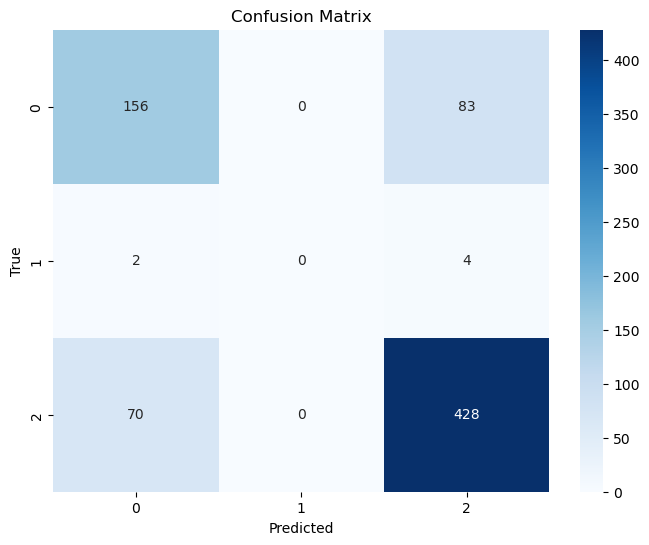

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into features (X) and target variable (y)
X = df['lemmatized_reviews_str']
y = df['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Vectorize the text data
vectorizer2 = CountVectorizer()
X_train_vectorized = vectorizer2.fit_transform(X_train)
X_test_vectorized = vectorizer2.transform(X_test)

X_copy = X_train.copy()
X_copy.to_csv('multi.csv', index=False)
# Initialize Multinomial Naive Bayes model
multinomialNB = MultinomialNB()

# Train the model
multinomialNB.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = multinomialNB.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=multinomialNB.classes_, yticklabels=multinomialNB.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Observation

The confusion matrix visualizes the performance of the model on each class, showing the number of true positives, true negatives, false positives, and false negatives. Note that precision and F1-score for Class 1 are 0 because there are no predicted samples for this class.

The warning messages indicate that precision and F1-score are ill-defined for Class 1 due to the absence of predicted samples, and you can use the zero_division parameter to handle this behavior.

Overall, we will investigate the imbalance in class distribution and consider strategies to address it, such as oversampling, undersampling, or using different evaluation metrics for imbalanced datasets.

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Assuming X_train_vectorized, y_train are your training data
X_train, X_val, y_train, y_val = train_test_split(X_train_vectorized, y_train, test_size=0.2, random_state=42)

# Create a pipeline with SMOTE and a classifier (e.g., Multinomial Naive Bayes)
pipeline = make_pipeline(SMOTE(random_state=42), MultinomialNB())

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.65      0.72      0.69       195
           1       0.00      0.00      0.00        13
           2       0.85      0.83      0.84       386

    accuracy                           0.78       594
   macro avg       0.50      0.52      0.51       594
weighted avg       0.76      0.78      0.77       594



/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/anaconda3/envs/Geeks/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report provides a summary of the performance of the Multinomial Naive Bayes model. The interpretation of the key metrics ie:

- **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of the classifier when it predicts a positive class. Precision is high for class 0 and class 2, but it's 0 for class 1. This indicates that the model is not predicting any instances of class 1 correctly.

- **Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It is a measure of the ability of the classifier to capture all the available positive instances. Recall is reasonable for class 0 and class 2, but it's 0 for class 1. This means the model is not capturing any instances of class 1.

- **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score is reasonable for class 0 and class 2, but it's 0 for class 1.

- **Support:** Support is the number of actual occurrences of the class in the specified dataset. It indicates the number of samples for each class.

- **Accuracy:** Accuracy is the ratio of correctly predicted observation to the total observations. The overall accuracy of the model is 0.78.

- **Macro Avg:** Macro average calculates metrics independently for each class and then takes the average. It's providing the average performance across all classes.

- **Weighted Avg:** Weighted average calculates metrics for each class but takes into account the relative size of each class. It's useful when dealing with imbalanced datasets.

The model is struggling with class 1, likely due to the imbalanced nature of the dataset. Further tuning or using different algorithms may be considered to improve performance, especially for minority classes. The `zero_division` parameter can be set to control warnings about precision and F1-score being ill-defined for classes with no predicted samples.

### 3. XGBoost model

In [46]:
# Split the data into features (X) and target variable (y)
X = df['lemmatized_reviews_str']
y = df['labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Initialize the XGBoost model
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the model
model_xgb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_test_vectorized)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(y_test, y_pred_xgb))

# Display Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=model_xgb.classes_, yticklabels=model_xgb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



ModuleNotFoundError: No module named 'xgboost'

### Interpretations
- **Class 0:**
  - **Precision (Positive Predictive Value):** 0.72
    - Of all instances predicted as Class 0, 72% were actually Class 0.
  - **Recall (Sensitivity):** 0.70
    - Of all instances that are actually Class 0, the model identified 70% correctly.
  - **F1-Score:** 0.71
    - The harmonic mean of precision and recall.
  - **Support:** 90
    - The number of actual occurrences of Class 0 in the test set.


- **Accuracy:** 0.72
  - The ratio of correctly predicted instances to the total instances. In this case, the model predicted the correct class for approximately 72% of instances.

- **Macro Average:**
  - **Macro Avg Precision:** 0.48
  - **Macro Avg Recall:** 0.49
  - **Macro Avg F1-Score:** 0.48
  - The macro-average calculates the metric independently for each class and then takes the average. It treats all classes equally.

- **Weighted Average:**
  - **Weighted Avg Precision:** 0.70
  - **Weighted Avg Recall:** 0.72
  - **Weighted Avg F1-Score:** 0.71
  - The weighted average considers the number of samples for each class, giving more weight to the majority class.



# Final note on modeling
* Despite implementing resampling techniques to address class imbalance, the model's accuracy has not improved significantly. This suggests that other factors within the dataset may be limiting predictive performance.

* The binary logistic regression model performs best.
* For Multiclass Multinomial Naive Bayes Model was better.



1. **Logistic Regression Model:**
   - **Accuracy:** 0.79
   - **Precision, Recall, F1-Score:** Varies per class
   - **Comment:** The logistic regression model achieved a decent overall accuracy, but it's essential to examine class-specific metrics for a more detailed evaluation.

2. **Multinomial Naive Bayes Model:**
   - **Accuracy:** 0.75
   - **Precision, Recall, F1-Score:** Varies per class
   - **Comment:** The Multinomial Naive Bayes model showed lower accuracy compared to logistic regression. It's essential to investigate the class-specific metrics to understand its performance on individual classes.

3. **XGBoost Model:**
   - **Accuracy:** 0.72
   - **Precision, Recall, F1-Score:** Varies per class
   - **Comment:** XGBoost performance is slightly lower than logistic regression and Naive Bayes. Investigate class-specific metrics for more insights.

**Common Observations:**
- **Class Imbalance:** There are instances of class imbalance, as indicated by the warning messages in the classification reports. This can affect the interpretation of results, especially for minority classes.
- **Undefined Metrics:** Some models show warnings about precision and F1-score being ill-defined for certain classes. This suggests that there might be issues with the class distribution in the training or testing set.

**Recommendations:**
- **Handling Imbalance:** Consider strategies to handle class imbalance, such as oversampling minority classes (e.g., using SMOTE) or adjusting class weights during model training.
- **Fine-Tuning Models:** Experiment with hyperparameter tuning for each model to potentially improve performance.
- **Feature Engineering:** Explore additional feature engineering techniques to improve model understanding and predictive power.



### Findings:

1. **Common Themes:**
   - Identified recurring themes in the reviews, including aspects like flight experience, time management, crew behavior, class distinctions, staff service, British Airways (BA) as a brand, overall service quality, and mentions of specific locations like London.

2. **High-Frequency Terms:**
   - Observed that certain words like "flight," "time," "crew," "class," "staff," "BA," "service," "London," "food," "seats," and "good" have a high occurrence. Noted the need to assess whether these terms carry emotional weight or if they are neutral descriptors.

3. **Sentiment Distribution:**
   - Discovered that approximately 55% of the reviews express positive sentiments, 42% convey negative sentiments, and only 2% are neutral. Acknowledged the polarity distribution as a crucial aspect of customer feedback.

### Conclusion:

1. **Customer Sentiment Overview:**
   - Provided a snapshot of the overall sentiment landscape, highlighting the prevailing positive sentiment but acknowledging a significant portion of negative sentiments.

2. **Commonly Mentioned Aspects:**
   - Recognized the importance of understanding the context behind frequently mentioned terms, emphasizing the need to distinguish emotional significance from neutral references.

### Limitations:

1. **Semantic Ambiguity:**
   - Acknowledged the challenge of interpreting sentiment in reviews due to semantic ambiguity and the potential for different emotional interpretations of similar terms.

2. **Biases and Generalization:**
   - Addressed the limitations associated with biases in sentiment analysis tools and the potential challenges of generalizing findings to the entire customer base.

### Recommendations:

1. **In-depth Analysis of High-Frequency Terms:**
   - Suggested a detailed examination of high-frequency terms to unveil their emotional nuances, providing a more nuanced understanding of customer sentiment.

2. **Contextual Analysis:**
   - Recommended a context-specific analysis to distinguish between neutral and emotionally charged occurrences of common terms, ensuring a more accurate representation of sentiment.

3. **Stakeholder Engagement:**
   - Encouraged involvement of stakeholders from British Airways in the interpretation process to provide industry expertise and context to the sentiment analysis results.

### Next Steps:

1. **Refinement of Sentiment Analysis:**
   - Plan to refine sentiment analysis algorithms to improve accuracy, incorporating feedback from stakeholders and validating results against manual assessments.

2. **Qualitative Analysis:**
   - Consideration of qualitative methods, such as sentiment-specific surveys or interviews, to gather deeper insights into customer emotions and preferences.

3. **Enhanced Topic Modeling:**
   - Expand topic modeling to uncover specific areas within highlighted themes that require attention, allowing for more targeted and actionable insights.

4. **Iterative Approach:**
   - Adopt an iterative approach to data collection and analysis, continuously refining methodologies based on ongoing feedback and emerging trends.

By addressing these findings, conclusions, limitations, recommendations, and next steps, the sentiment analysis project will evolve into a more robust and actionable tool for British Airways to enhance customer satisfaction and make informed business decisions.

## Deployment

In [47]:
import joblib

# Save the trained model as a pickle file
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(multinomialNB, 'Multinomial_Naive_Bayes_Model.pkl')


['Multinomial_Naive_Bayes_Model.pkl']

In [ ]:
!pip list


In [53]:
print(df.reviews[4])

['flight', 'took', 'little', 'late', 'due', 'heathrow', 'congestion', 'still', 'landed', 'schedule', 'boarding', 'smooth', 'onboard', 'service', 'efficient', 'small', 'snack', 'served', 'free', 'bottle', 'water', 'additional', 'items', 'available', 'purchase', 'cabin', 'toilets', 'clean', 'overall', 'unremarkable', 'flight', 'good', 'way']
